In [13]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
%matplotlib inline

1. Загрузить файл auto.csv 

In [3]:
df=pd.read_csv('auto.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


2. Рассчитать основные статистики для переменных(среднее,
медиана, мода, мин/макс, сред. отклонение) 

In [9]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
print('Мат ожидание =', statistics.mean(df['price']))
print('Медиана =', statistics.median(df['price']))
print('Мода =', statistics.mode(df['price']))
print('Минимум =', min(df['price']))
print('Максимум =', max(df['price']))
print('Стандартное отклонение =', statistics.pstdev(df['price']))

Мат ожидание = 13312.71219512195
Медиана = 10295
Мода = 6785
Минимум = 5118
Максимум = 45400
Стандартное отклонение = 8082.686173881863


In [7]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [27]:
df.loc[df['price'] > 15000, :]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,158,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


3. Рассчитать и визуализировать корреляционную матрицу для
переменных 

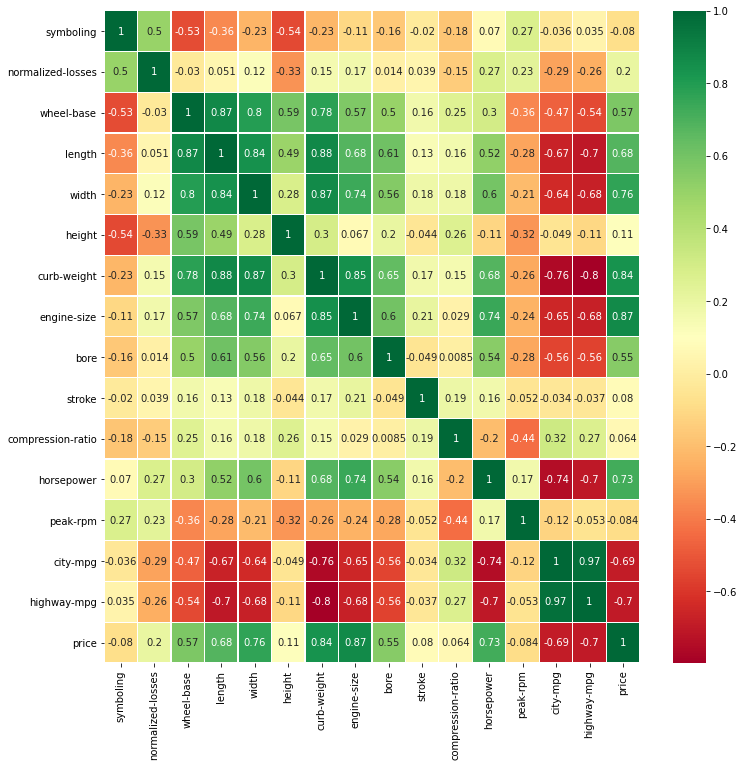

In [6]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

4. Визуализировать распределение переменной ‘Price’,
рассчитать показатели skewness и kurtosis 

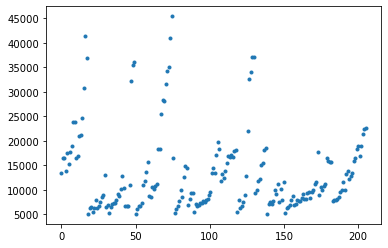

In [10]:
len_column = len(df['price']) # сколько значений в колонке
# генерируем значения от 0 до len_column 
x = np.linspace(0, len_column, len_column)
# выводим все значения из таблицы
plt.scatter(x, df['price'], marker='.')

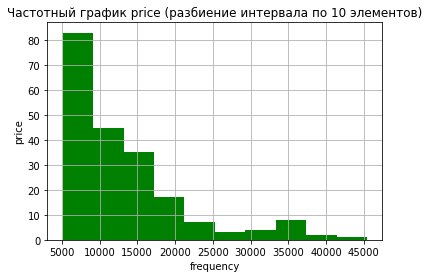

In [11]:
n, bins, patches = plt.hist(df['price'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('price')
plt.title('Частотный график price (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Геометрическое распределение

skew - коэффицие́нт асимметри́и в теории вероятностей — величина, характеризующая асимметрию распределения данной случайной величины: положительное - выборка наклонена вправо, отрицательная - влево
kurt - коэффицие́нт эксце́сса - мера остроты пика

In [19]:
from scipy.stats import kurtosis, skew

print( 'kurtosis: {}'.format( kurtosis(df['price']) ))
print( 'skewness: {}'.format( skew(df['price']) ))

kurtosis: 2.848082544390688
skewness: 1.7534486514523662


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

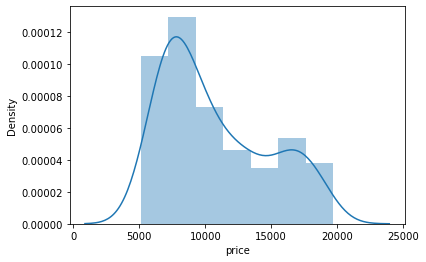

In [36]:
df1 = df[df['price'] < 20000]
sns.distplot(df1['price'])

5. Визуализировать несколько взаимосвязей между
переменными 

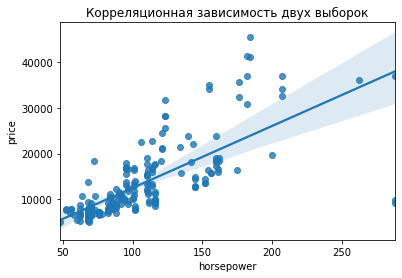

In [20]:
horsepower = df['horsepower']
price = df['price']
# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x = horsepower, y = price, data=df, fit_reg=True)
plt.xlabel('horsepower') 
plt.ylabel('price')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

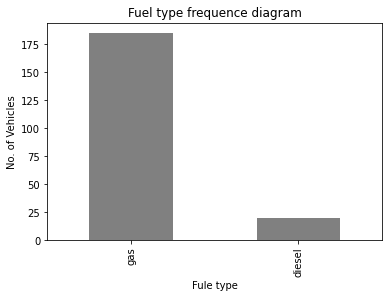

In [23]:
df['fuel-type'].value_counts().plot(kind='bar',color='grey')
plt.title("Fuel type frequence diagram")
plt.ylabel('No. of Vehicles')
plt.xlabel('Fule type');

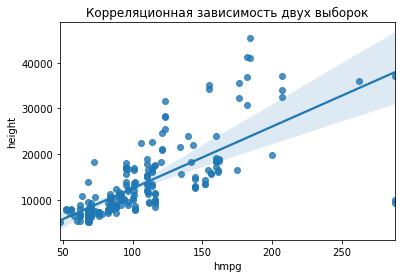

In [37]:
hmpg = df['highway-mpg']
height = df['height']
# параметр fit_reg - строит линию регрессии для двух выборок
sns.regplot(x = horsepower, y = price, data=df, fit_reg=True)
plt.xlabel('hmpg')
plt.ylabel('height')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

6. Выдвинуть несколько гипотез по набору имеющихся
переменных и проверить эти гипотезы с использованием t-test. 

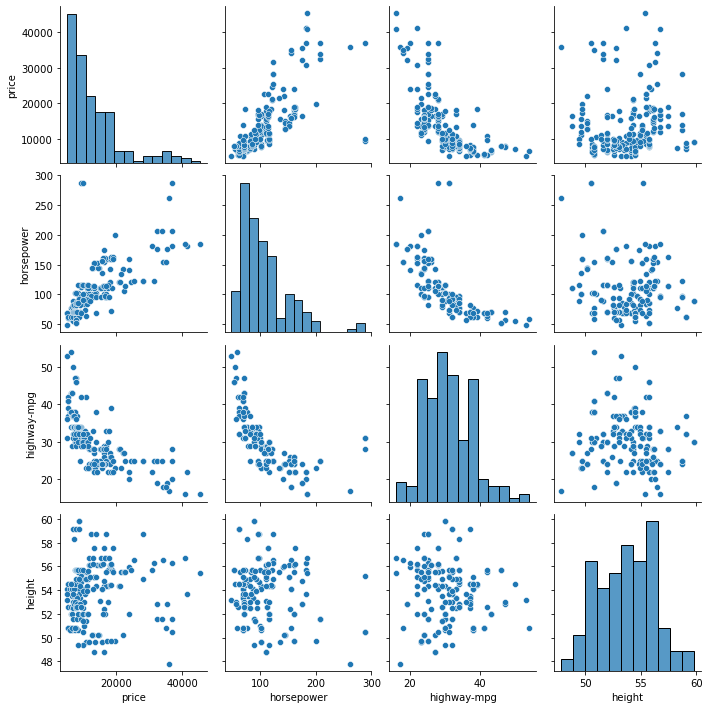

In [38]:
sns_plot = sns.pairplot(
    df[['price', 'horsepower', 'highway-mpg', 'height']])
sns_plot

H0 = Макс скорость на бензине такая же, как и на дизеле.
highway mpg - макс скорость.
fuel type - тип двигателя

In [45]:
small_1 = df[df['fuel-type']=='gas']['highway-mpg']
small_2 = df[df['fuel-type']=='diesel']['highway-mpg']

print(stats.ttest_ind(small_1, small_2))

Ttest_indResult(statistic=-2.7782750192973515, pvalue=0.005977403875730944)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


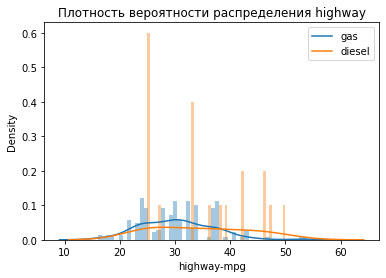

In [43]:
sns.distplot(small_1, 50)
sns.distplot(small_2, 50)
plt.title('Плотность вероятности распределения highway')
plt.legend(['gas', 'diesel'])
plt.show()

p-value равно 0.006, что намного меньше стандартной альфа ошибки 0.05, поэтому мы не принимаем нулевую гипотезу и можем сказать, что имеется статистическое различие между дизелью и газом в целом.

H0 - Переднеприводные и заднеприводные автомобили стоят одинаково

In [46]:
small_3 = df[df['drive-wheels']=='fwd']['price']
small_4 = df[df['drive-wheels']=='rwd']['price']

print(stats.ttest_ind(small_3, small_4))

Ttest_indResult(statistic=-11.657566836950782, pvalue=3.80874683861172e-24)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


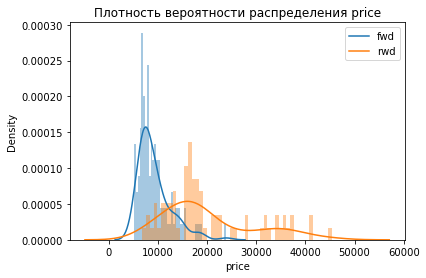

In [48]:
sns.distplot(small_3, 50)
sns.distplot(small_4, 50)
plt.title('Плотность вероятности распределения price')
plt.legend(['fwd', 'rwd'])
plt.show()

Значение p-value очень низкое, можем смело отвергать эту гипотезу. По графику видно, что переднеприводные довольно дешевые, либо же недостаток данных сыграл роль

H0 - двухдверные машины имеют одинаковый вес с четырехдверными.
curb-weight - снаряженная масса.
num-of-doors - количество дверей.

In [49]:
small_5 = df[df['num-of-doors']=='two']['curb-weight']
small_6 = df[df['num-of-doors']=='four']['curb-weight']

print(stats.ttest_ind(small_5, small_6))

Ttest_indResult(statistic=-2.768151943464934, pvalue=0.006159162576171718)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


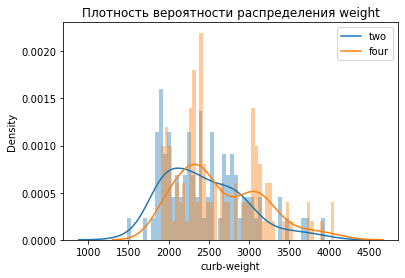

In [50]:
sns.distplot(small_5, 50)
sns.distplot(small_6, 50)
plt.title('Плотность вероятности распределения weight')
plt.legend(['two', 'four'])
plt.show()

P-value = 0.06 говорит о том, что и эта гипотеза отвергается